# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get('coord').get('lat')
        city_lng = city_weather.get('coord').get('lon')
        city_max_temp = city_weather.get('main').get('temp_max')
        city_humidity = city_weather.get('main').get('humidity')
        city_clouds = city_weather.get('main').get('humidity')
        city_wind = city_weather.get('wind').get('speed')
        city_country = city_weather.get('sys').get('country')
        city_date = datetime.utcfromtimestamp(city_weather.get('dt')).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | lihue
Processing Record 7 of Set 1 | maragogi
Processing Record 8 of Set 1 | nova sintra
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | vorgashor
Processing Record 11 of Set 1 | pacific grove
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | sungai penuh
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | selkirk
Processing Record 19 of Set 1 | vorkuta
Processing Record 20 of Set 1 | sokoni
Processing Record 21 of Set 1 | northam
Processing

Processing Record 37 of Set 4 | turinsk
Processing Record 38 of Set 4 | bayganin
Processing Record 39 of Set 4 | passagem franca
Processing Record 40 of Set 4 | macas
Processing Record 41 of Set 4 | nar'yan-mar
Processing Record 42 of Set 4 | san antonio de pale
Processing Record 43 of Set 4 | bronnitsy
Processing Record 44 of Set 4 | st. john's
Processing Record 45 of Set 4 | sidi bennour
Processing Record 46 of Set 4 | kirensk
Processing Record 47 of Set 4 | gjorce petro
City not found. Skipping...
Processing Record 48 of Set 4 | portland
Processing Record 49 of Set 4 | mammoth lakes
Processing Record 0 of Set 5 | kolonia town
Processing Record 1 of Set 5 | huarmey
Processing Record 2 of Set 5 | klyuchi
Processing Record 3 of Set 5 | palikir - national government center
Processing Record 4 of Set 5 | geraldton
Processing Record 5 of Set 5 | soio
Processing Record 6 of Set 5 | ishigaki
Processing Record 7 of Set 5 | jabor
Processing Record 8 of Set 5 | fale old settlement
Processing R

Processing Record 28 of Set 8 | gadzhiyevo
Processing Record 29 of Set 8 | springs
Processing Record 30 of Set 8 | magadan
Processing Record 31 of Set 8 | quang ngai
Processing Record 32 of Set 8 | bay harbor
Processing Record 33 of Set 8 | mitu
Processing Record 34 of Set 8 | balykchy
Processing Record 35 of Set 8 | lospalos
Processing Record 36 of Set 8 | vega de alatorre
Processing Record 37 of Set 8 | keflavik
Processing Record 38 of Set 8 | pindushi
Processing Record 39 of Set 8 | aridaia
Processing Record 40 of Set 8 | kourou
Processing Record 41 of Set 8 | dakhla
Processing Record 42 of Set 8 | calcot
Processing Record 43 of Set 8 | nebraska city
Processing Record 44 of Set 8 | olinda
Processing Record 45 of Set 8 | shubarshi
Processing Record 46 of Set 8 | remire-montjoly
Processing Record 47 of Set 8 | poxoreo
Processing Record 48 of Set 8 | cuamba
Processing Record 49 of Set 8 | bandarbeyla
Processing Record 0 of Set 9 | venustiano carranza
Processing Record 1 of Set 9 | lubu

Processing Record 17 of Set 12 | quesnel
Processing Record 18 of Set 12 | tura
Processing Record 19 of Set 12 | kavaratti
Processing Record 20 of Set 12 | traverse city
Processing Record 21 of Set 12 | inari
Processing Record 22 of Set 12 | hailar
Processing Record 23 of Set 12 | east grand forks
Processing Record 24 of Set 12 | ulladulla
Processing Record 25 of Set 12 | sadjoavato
City not found. Skipping...
Processing Record 26 of Set 12 | lazaro cardenas
Processing Record 27 of Set 12 | antsiranana
Processing Record 28 of Set 12 | santa flavia
Processing Record 29 of Set 12 | loreto
Processing Record 30 of Set 12 | deir ez-zor
Processing Record 31 of Set 12 | aleg
Processing Record 32 of Set 12 | prado
Processing Record 33 of Set 12 | volokolamsk
Processing Record 34 of Set 12 | urzhar
Processing Record 35 of Set 12 | cape coast
Processing Record 36 of Set 12 | la oroya
Processing Record 37 of Set 12 | suances
Processing Record 38 of Set 12 | vernon
Processing Record 39 of Set 12 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,284.72,90,90,1.34,NZ,2023-11-27 20:05:15
1,wailua homesteads,22.0669,-159.3780,298.39,90,90,5.14,US,2023-11-27 20:08:05
2,bethel,41.3712,-73.4140,282.71,63,63,2.57,US,2023-11-27 20:08:05
3,adamstown,-25.0660,-130.1015,295.13,82,82,12.24,PN,2023-11-27 20:08:05
4,lihue,21.9789,-159.3672,298.73,86,86,5.14,US,2023-11-27 20:08:05


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,284.72,90,90,1.34,NZ,2023-11-27 20:05:15
1,wailua homesteads,22.0669,-159.3780,298.39,90,90,5.14,US,2023-11-27 20:08:05
2,bethel,41.3712,-73.4140,282.71,63,63,2.57,US,2023-11-27 20:08:05
3,adamstown,-25.0660,-130.1015,295.13,82,82,12.24,PN,2023-11-27 20:08:05
4,lihue,21.9789,-159.3672,298.73,86,86,5.14,US,2023-11-27 20:08:05


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

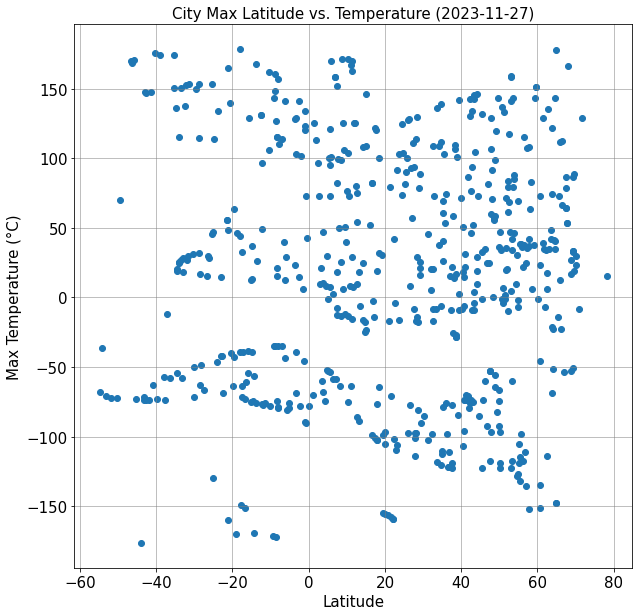

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 10))
plt.scatter(city_data_df.Lat, city_data_df.Lng, marker='o')

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Temperature ({datetime.now().date()})', fontsize=15)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Max Temperature (°C)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='grey', linestyle='-', linewidth=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

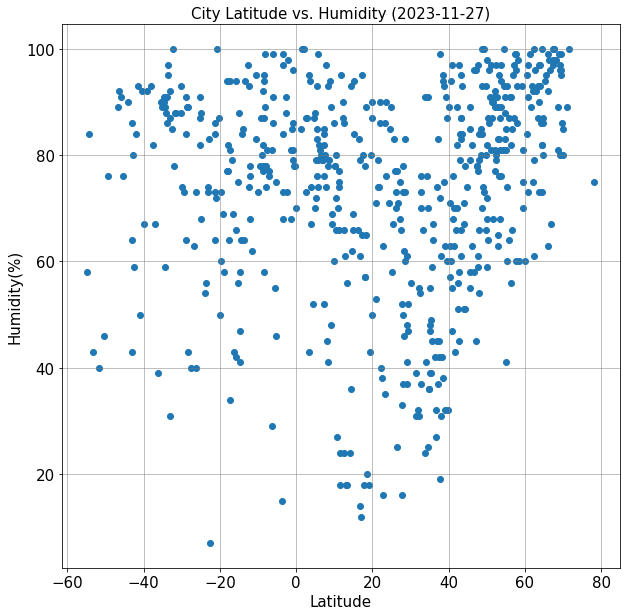

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 10))
plt.scatter(city_data_df.Lat, city_data_df.Humidity, marker='o')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({datetime.now().date()})', fontsize=15)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Humidity(%)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='grey', linestyle='-', linewidth=0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

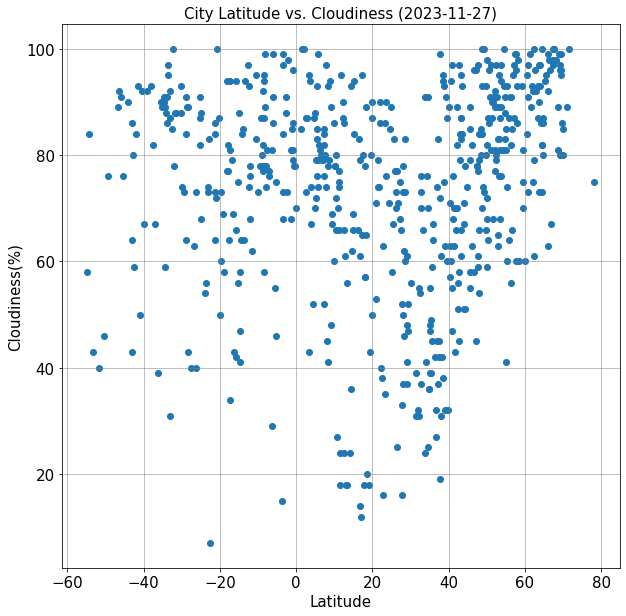

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 10))
plt.scatter(city_data_df.Lat, city_data_df.Cloudiness, marker='o')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({datetime.now().date()})', fontsize=15)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Cloudiness(%)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='grey', linestyle='-', linewidth=0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

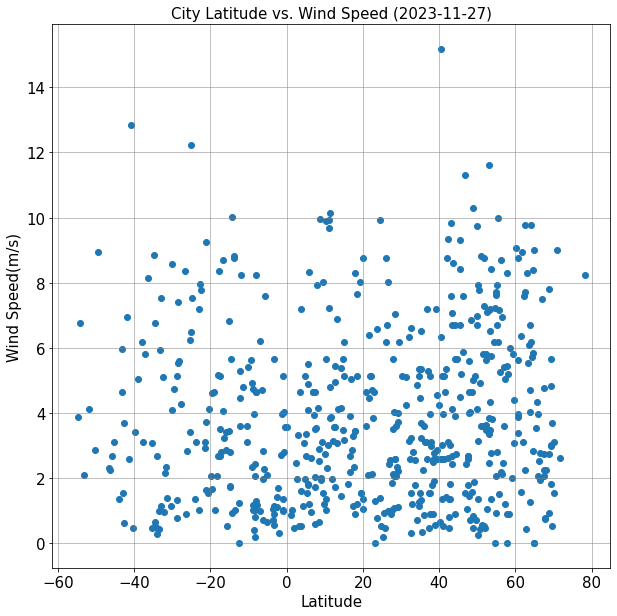

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 10))
plt.scatter(city_data_df.Lat, city_data_df['Wind Speed'], marker='o')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({datetime.now().date()})', fontsize=15)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Wind Speed(m/s)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='grey', linestyle='-', linewidth=0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def LR_plot(x, y, x_label, y_label, title):
    # Reshape the data for scikit-learn
    x_reshaped = np.array(x).reshape(-1, 1)
    y_reshaped = np.array(y)

    # Create a linear regression model
    model = LinearRegression()
    model.fit(x_reshaped, y_reshaped)

    # Make predictions using the model
    y_pred = model.predict(x_reshaped)

    # Calculate R-squared value
    r_squared = r2_score(y_reshaped, y_pred)
    print(f"The r-value is: {r_squared}")
    
    slp = model.coef_[0]
    inter = model.intercept_
    
#     print(f"y = {round(slp,2)}x + {round(inter,2)}")
    plt.figure(figsize=(10, 10))
    # Plot the data and the regression line
    plt.scatter(x, y, label='Data')
    plt.plot(x, y_pred, color='red', linewidth=2, label='Linear Regression')
    
    plt.text(0.05, 0.05, f"y = {round(slp,2)}x + {round(inter,2)}" , color='red', fontsize=20, ha='left', va='bottom', transform=plt.gca().transAxes)
    
    plt.title(f'{title}', fontsize=15)
    plt.xlabel(x_label, fontsize=15)
    plt.ylabel(y_label, fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,wailua homesteads,22.0669,-159.3780,298.39,90,90,5.14,US,2023-11-27 20:08:05
2,bethel,41.3712,-73.4140,282.71,63,63,2.57,US,2023-11-27 20:08:05
4,lihue,21.9789,-159.3672,298.73,86,86,5.14,US,2023-11-27 20:08:05
6,nova sintra,14.8667,-24.7167,295.47,66,66,3.47,CV,2023-11-27 20:08:05
8,vorgashor,67.5833,63.9500,250.54,98,98,2.05,RU,2023-11-27 20:08:06


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,284.72,90,90,1.34,NZ,2023-11-27 20:05:15
3,adamstown,-25.0660,-130.1015,295.13,82,82,12.24,PN,2023-11-27 20:08:05
5,maragogi,-9.0122,-35.2225,299.24,80,80,4.93,BR,2023-11-27 20:08:05
7,blackmans bay,-43.0167,147.3167,284.22,86,86,1.55,AU,2023-11-27 20:08:05
10,puerto ayora,-0.7393,-90.3518,299.57,86,86,4.02,EC,2023-11-27 20:08:06


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7656784154615887


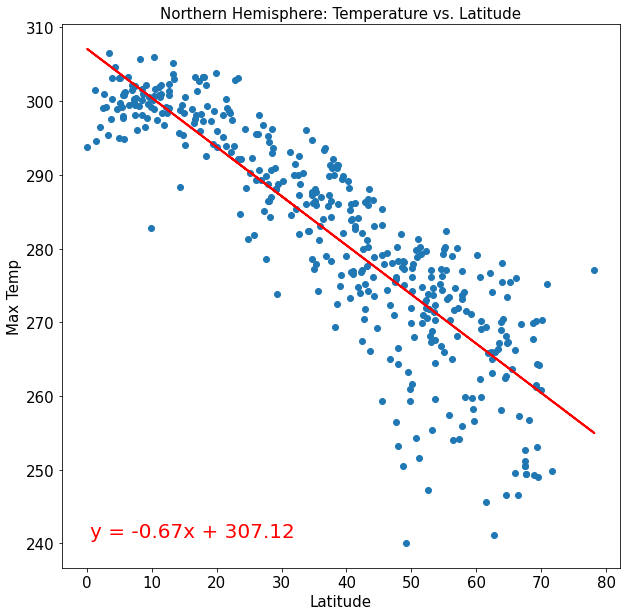

In [15]:
# Linear regression on Northern Hemisphere
LR_plot(northern_hemi_df.Lat, northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', "Northern Hemisphere: Temperature vs. Latitude")

The r-value is: 0.4681365155328213


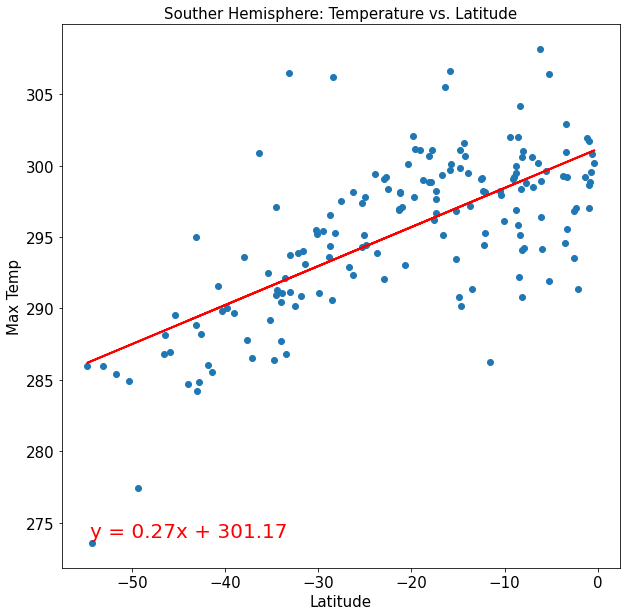

In [16]:
# Linear regression on Southern Hemisphere
LR_plot(southern_hemi_df.Lat, southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', "Souther Hemisphere: Temperature vs. Latitude")

**Discussion about the linear relationship:** As we can see, the temperature has negative linear relationship in Northern Hemisphere with Latitude.</br>
On the other hand, the temperature has positive linear relationship in Northern Hemisphere with Latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10365005432847796


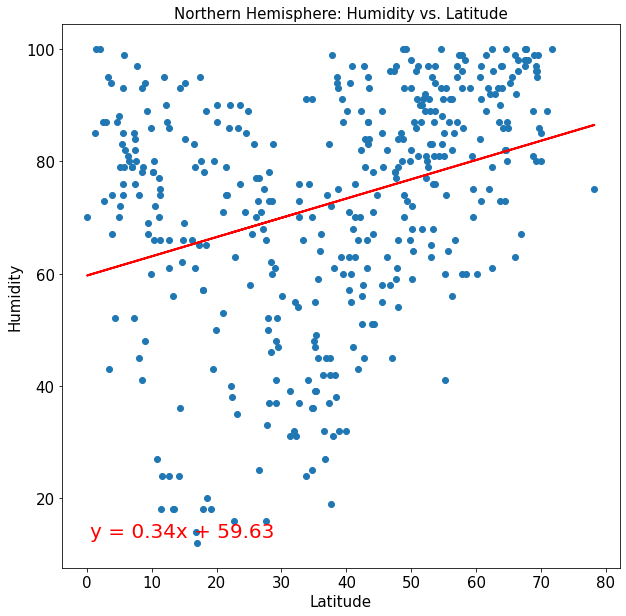

In [17]:
# Northern Hemisphere
LR_plot(northern_hemi_df.Lat, northern_hemi_df['Humidity'], 'Latitude', 'Humidity', "Northern Hemisphere: Humidity vs. Latitude")

The r-value is: 0.004614828899184409


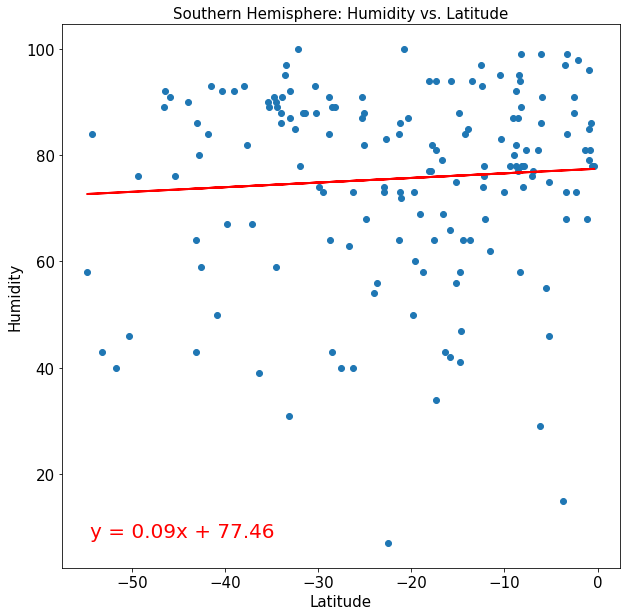

In [18]:
# Southern Hemisphere
LR_plot(southern_hemi_df.Lat, southern_hemi_df['Humidity'], 'Latitude', 'Humidity', "Southern Hemisphere: Humidity vs. Latitude")

**Discussion about the linear relationship:** We can't establish any linear relationship among Humidity and Latitude in both Northern and Southern Hemisphere as the humidity data is very scattered in all the Latitudes.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10365005432847796


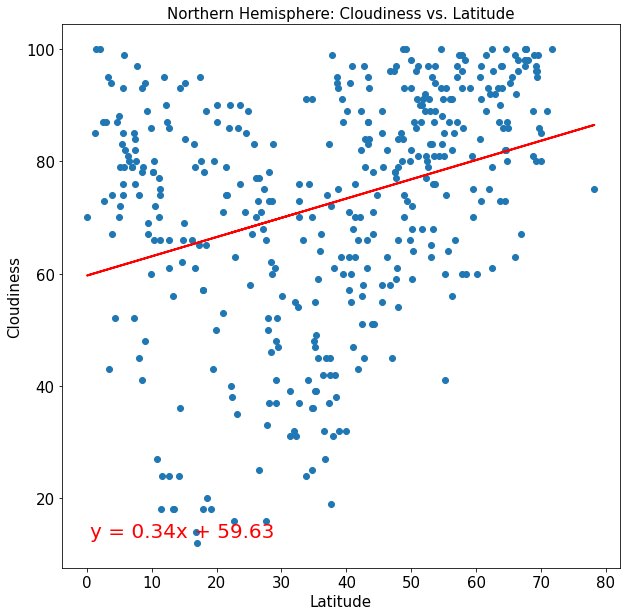

In [19]:
# Northern Hemisphere
LR_plot(northern_hemi_df.Lat, northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', "Northern Hemisphere: Cloudiness vs. Latitude")

The r-value is: 0.004614828899184409


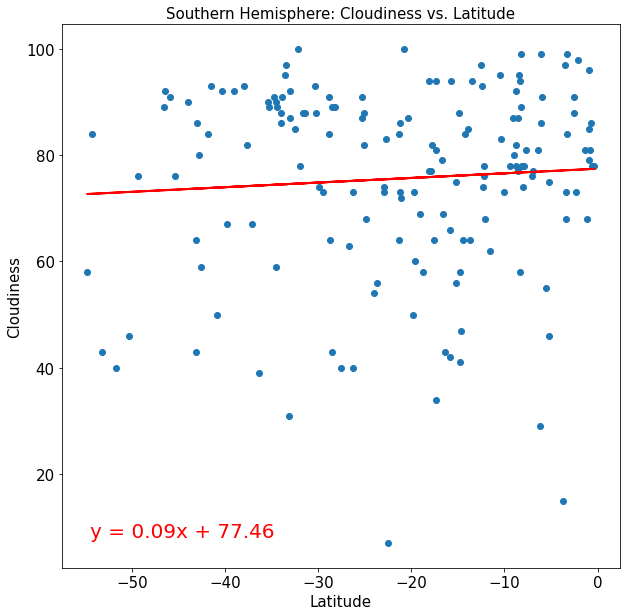

In [20]:
# Southern Hemisphere
LR_plot(southern_hemi_df.Lat, southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', "Southern Hemisphere: Cloudiness vs. Latitude")

**Discussion about the linear relationship:** We can't establish any linear relationship among Cloudiness and Latitude in both Northern and Southern Hemisphere as the Cloudiness data is very scattered in all the Latitudes.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.017795359668393296


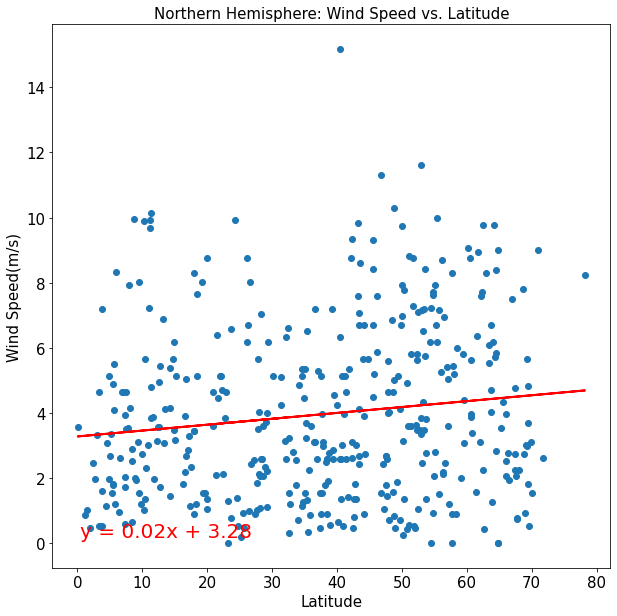

In [21]:
# Northern Hemisphere
LR_plot(northern_hemi_df.Lat, northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed(m/s)', "Northern Hemisphere: Wind Speed vs. Latitude")

The r-value is: 0.02533147269925662


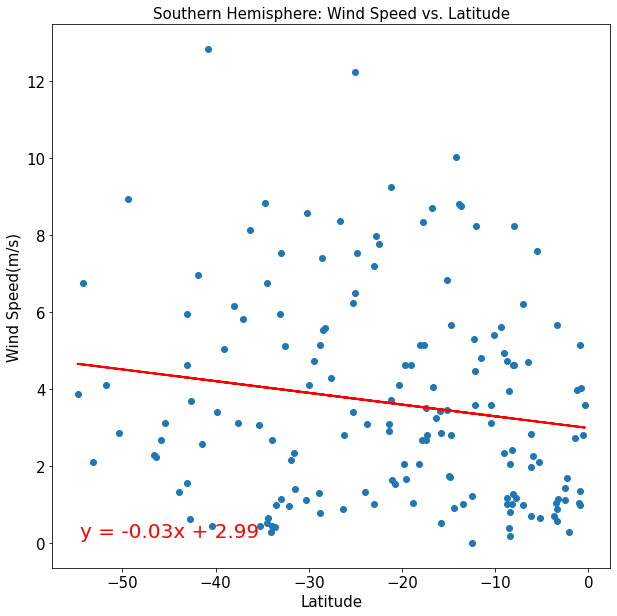

In [22]:
# Southern Hemisphere
LR_plot(southern_hemi_df.Lat, southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed(m/s)', "Southern Hemisphere: Wind Speed vs. Latitude")

**Discussion about the linear relationship:** We can't establish any linear relationship among Wind Speed and Latitude in both Northern and Southern Hemisphere as the Wind Speed data is very scattered in all the Latitudes.